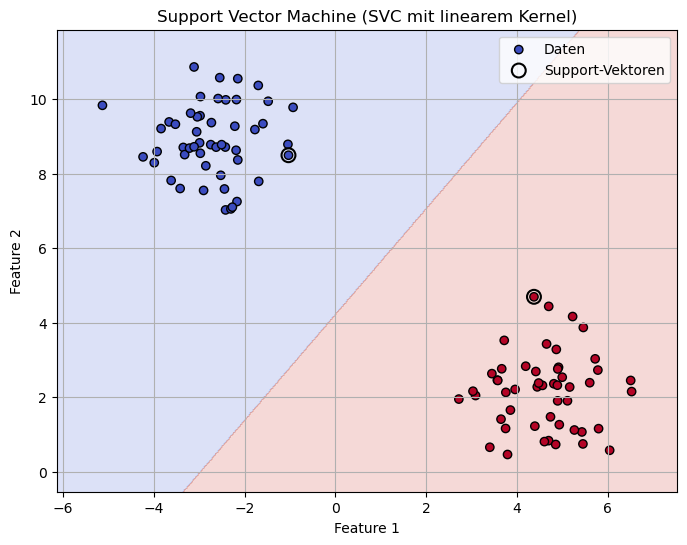

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.svm import SVC

# Beispieldaten erzeugen (zwei Klassen, 2D)
input_data, output_data = make_blobs(n_samples=100, centers=2, cluster_std=1.0, random_state=42)

# SVM-Klassifikator mit linearem Kernel
svm = SVC(kernel='linear', C=1.0)
svm.fit(input_data, output_data)

# Vorhersagegitter erzeugen
xx, yy = np.meshgrid(
    np.linspace(input_data[:, 0].min() - 1, input_data[:, 0].max() + 1, 500),
    np.linspace(input_data[:, 1].min() - 1, input_data[:, 1].max() + 1, 500)
)
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')
plt.scatter(input_data[:, 0], input_data[:, 1], c=output_data, cmap='coolwarm', edgecolors='k', label="Daten")
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', linewidths=1.5, label='Support-Vektoren')
plt.title("Support Vector Machine (SVC mit linearem Kernel)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()